In [1]:
from modules import create_emto_inputs
from modules import DOSParser, DOSPlotter
import subprocess

In [3]:
emto_inputs = {
    "output_path": "../systems/Co_hcp",
    "job_name": "Co",
    "cif_file": None,
    "lat": 4,
    "a": 2.47,
    "sites": [{"position": [0, 0, 0], 'elements': ['Co'], 'concentrations': [1.0]},
              {"position": [0.666667, 0.333333, 0.500000], 'elements': ['Co'], 'concentrations': [1.0]}],
    "dmax": None,
    "ca_ratios": [1.4,1.5,1.6,1.7,1.8],
    "sws_values": [2.6],
    "magnetic": 'F',
    "user_magnetic_moments": None,
    "create_job_script": True,
    "job_mode": "serial",
    "prcs": 8,
    "time": "00:30:00",
    "account": "naiss2025-1-38",
    "optimize_dmax": True,
    "dmax_initial": 3,
    "dmax_target_vectors": 100,
    "dmax_vector_tolerance": 15,
    "kstr_executable": "/home/x_pamca/postdoc_proj/emto/bin/kstr.exe"
}

create_emto_inputs(**emto_inputs)

Created directory structure in: ../systems/Co_hcp

Creating structure from parameters...
  Lattice type: LAT=4
  Lattice parameter a: 2.47 Å
  Number of sites: 2
  Structure created: LAT=4 (Hexagonal)
  Number of atoms: NQ3=2
  Maximum NL: 3

DMAX OPTIMIZATION WORKFLOW

Step 1: Creating initial KSTR inputs (DMAX=3)...
Processing c/a ratios in descending order: ['1.80', '1.70', '1.60', '1.50', '1.40']
KSTR input file '../systems/Co_hcp/smx/Co_1.80.dat' created successfully.
KSTR input file '../systems/Co_hcp/smx/Co_1.70.dat' created successfully.
KSTR input file '../systems/Co_hcp/smx/Co_1.60.dat' created successfully.
KSTR input file '../systems/Co_hcp/smx/Co_1.50.dat' created successfully.
KSTR input file '../systems/Co_hcp/smx/Co_1.40.dat' created successfully.
✓ Created 5 KSTR input files

Step 2: Running KSTR calculations...
  Running KSTR for c/a = 1.80... 

✓ (data extracted in 0.0s)
  Running KSTR for c/a = 1.70... ✓ (data extracted in 0.0s)
  Running KSTR for c/a = 1.60... ✓ (data extracted in 0.0s)
  Running KSTR for c/a = 1.50... ✓ (data extracted in 0.0s)
  Running KSTR for c/a = 1.40... ✓ (data extracted in 0.0s)

Step 2b: Organizing KSTR output files...
  ✓ Moved 35 files to smx/logs/ (outputs + initial .dat files)

Step 3: Parsing KSTR outputs...

Step 4: Optimizing DMAX values...

Step 1: Analyzing reference ratio (c/a = 1.80, largest)...
  Reference: DMAX=2.497999, Shell=12, Vectors=87
  Using Shell 12 as target for all ratios

Step 2: Finding DMAX for remaining ratios (target: Shell 12)...
  Processing c/a = 1.70... DMAX=2.460860, Vectors=87
  Processing c/a = 1.60... DMAX=2.444040, Vectors=87
  Processing c/a = 1.50... DMAX=2.322893, Vectors=87
  Processing c/a = 1.40... DMAX=2.227106, Vectors=87

Step 3: Rounding DMAX values to 3 decimals...
  c/a = 1.80: 2.498 (no change)
  c/a = 1.70: 2.460860 → 2.461
  c/a = 1.60: 2.444040

In [2]:
from utils.running_bash import run_sbatch, chmod_and_run

chmod_and_run("run_Co.sh", stdout_file="Co_output.log", stderr_file="Co_error.log")

Making script executable and running...


chmod: cannot access 'run_Co.sh': No such file or directory


CalledProcessError: Command '['chmod', '+x', 'run_Co.sh']' returned non-zero exit status 1.

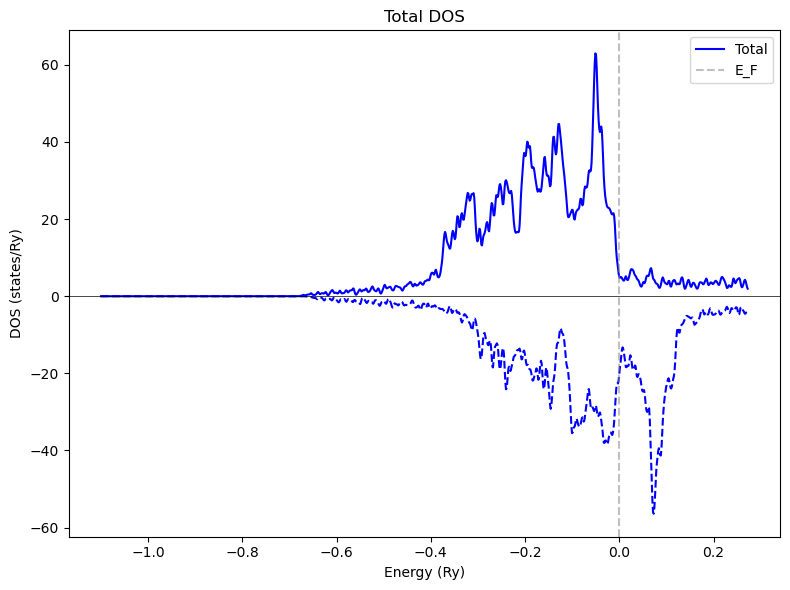

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Total DOS'}, xlabel='Energy (Ry)', ylabel='DOS (states/Ry)'>)

In [13]:
dos = DOSParser("/home/x_pamca/postdoc_proj/EMTO_input_automation/files/systems/Co_hcp/Co_1.40_2.60.dos")


plot = DOSPlotter(dos)

plot.plot_total()

In [2]:
cif='testing/FePt.cif'

create_emto_inputs('files', 'fept', cif_file=cif)


Created directory structure in: files

Parsing CIF file: testing/FePt.cif
  Detected lattice: LAT=5 (Simple tetragonal)
  Number of atoms: NQ3=2
  Maximum NL: 3

Creating input files for 1 c/a ratios and 1 SWS values...

  c/a = 1.37
KSTR input file 'files/smx/fept_1.37.dat' created successfully.
SHAPE input file 'files/shp/fept_1.37.dat' created successfully.
KGRN input file 'files/fept_1.37_1.49.dat' created successfully.
KFCD input file 'files/fcd/fept_1.37_1.49.dat' created successfully.

Creating serial job script...
Created serial job script: files/run_fept.sh
To submit: sbatch run_fept.sh

WORKFLOW COMPLETE
Files created:
  KSTR:  1 files in files/smx/
  SHAPE: 1 files in files/shp/
  KGRN:  1 files in files/
  KFCD:  1 files in files/fcd/


In [47]:
a = 3.86
c = 3.76
c/a

0.9740932642487047

In [48]:
lattice_vectors =  np.array([[1.0,  0.0, 0.0], [0.0,  1.0, 0.0], [0.0,  0.0, 0.9740932642487047]])
fractional_coors = np.array([[0.0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.0, 0.0, 0.0], [0.5, 0.5, 0.0]])

In [49]:
for i in range(4):
    print(np.dot(lattice_vectors,fractional_coors[i]))

[0.         0.5        0.48704663]
[0.5        0.         0.48704663]
[0. 0. 0.]
[0.5 0.5 0. ]


In [50]:
cart_coords = fractional_coors @ lattice_vectors

for x,y,z in lattice_vectors:
    print(f"{x:8.8f}\t{y:10.8f}\t{z:10.8f}")
    
for x,y,z in cart_coords:
    print(f"\t{x:.8f}\t{y:.8f}\t{z:.8f}")



1.00000000	0.00000000	0.00000000
0.00000000	1.00000000	0.00000000
0.00000000	0.00000000	0.97409326
	0.00000000	0.50000000	0.48704663
	0.50000000	0.00000000	0.48704663
	0.00000000	0.00000000	0.00000000
	0.50000000	0.50000000	0.00000000


In [6]:
def create_kstr_input(
    filename,
    job_name,
    DMAX,
    LAT,
    NL,
    NQ3,
    A, B, C,
    lattice_vectors,
    lattice_positions,
):
    """
    Create a KSTR input file for EMTO.

    Parameters
    ----------
    filename : str
        Name of the output .smx file (e.g., 'fept.smx').
    job_name : str
        The JOBNAM (e.g., 'fept').
    NL : int
        Number of layers.
    NQ3 : int
        Value for NQ3 parameter.
    A, B, C : float
        Lattice constants.
    lattice_vectors : list[list[float]]
        3x3 matrix for lattice vectors.
    lattice_positions : list[list[float]]
        List of atomic positions.
    """

    template = f"""KSTR      HP......=N                               xx xxx xx
JOBNAM...={job_name:<10} MSGL.=  1 MODE...=B STORE..=Y HIGH...=Y
DIR001=./
DIR006=
Slope and Madelung matrices
NL.....= {NL:>1} NLH...= 9 NLW...= 9 NDER..= 6 ITRANS= 3 NPRN..= 1
(K*W)^2..=   0.00000 DMAX....=    {DMAX:>6} RWATS...=      0.10
NQ3...= {NQ3:>2} LAT...= {LAT:>1} IPRIM.= 0 NGHBP.=13 NQR2..= 0        80
A........= {A:.7f} B.......= {B:.7f} C.......={C:.8f}
"""

    # Add lattice vectors
    for vec in lattice_vectors:
        template += f"{vec[0]:.8f}\t{vec[1]:.8f}\t{vec[2]:.8f}\n"

    # Add lattice positions
    for pos in lattice_positions:
        template += f"\t{pos[0]:.8f}\t{pos[1]:.8f}\t{pos[2]:.8f}\n"

    # Append fixed section
    for i in range(NQ3):
        template += f"a/w......= 0.70 0.70 0.70 0.70\n"

    template += f"""NL_mdl.= {2*NL + 1}
LAMDA....=    2.5000 AMAX....=    4.5000 BMAX....=    4.5000
"""
    
    with open(filename, "w") as f:
        f.write(template)

    print(f"KSTR input file '{filename}' created successfully.")


In [9]:
create_kstr_input(
    filename="fept.smx",
    job_name="fept",
    NL=3,
    NQ3=4,
    A=1.0,
    B=1.0,
    C=1.61096779,
    DMAX=1.3,
    LAT=5,
    lattice_vectors=[
        [1.00000000, 0.00000000, 0.00000000],
        [0.00000000, 1.00000000, 0.00000000],
        [0.00000000, 0.00000000, 0.96290532],
    ],
    lattice_positions=[
        [0.00000000, 0.50000000, 0.48145266],
        [0.50000000, 0.00000000, 0.48145266],
        [0.00000000, 0.00000000, 0.00000000],
        [0.50000000, 0.50000000, 0.00000000],
    ],
)


KSTR input file 'fept.smx' created successfully.


In [11]:
from pymatgen.core import Structure

In [12]:
structure = Structure.from_file('FePt.cif')

In [17]:
structure.lattice.matrix

array([[2.72800402e+00, 0.00000000e+00, 1.67042070e-16],
       [4.38696505e-16, 2.72800402e+00, 1.67042070e-16],
       [0.00000000e+00, 0.00000000e+00, 3.73735627e+00]])

In [23]:
atoms = [i.specie.name for i in structure.sites]

set(atoms)

{'Fe', 'Pt'}

In [ ]:
atomsstructure.sites[0].specie.name

'Fe'

In [ ]:
a = structure.lattice.a
matrix = structure.lattice.matrix/a
cart_coords = np.array([i.coords/a for i in structure.sites])

In [10]:
matrix

NameError: name 'matrix' is not defined

In [ ]:
structure.sites[0].coords

array([0., 0., 0.])

In [ ]:
for x,y,z in matrix:
    print(f"{x:8.8f}\t{y:10.8f}\t{z:10.8f}")
    
for x,y,z in cart_coords:
    print(f"\t{x:.8f}\t{y:.8f}\t{z:.8f}")

1.00000000	0.00000000	0.00000000
0.00000000	1.00000000	0.00000000
0.00000000	0.00000000	1.36999661
	0.00000000	0.00000000	0.00000000
	0.50000000	0.50000000	0.68499831


In [26]:
v= 55.277516

r = (3*v/(4*np.pi))**(1/3)
r

2.363124683563768

In [43]:
a = 3.86
b = 3.86
c = 3.76
v = a*b*c/4
r = (3*v/(4*np.pi))**(1/3)/0.529
r

2.8267166641510864

In [46]:
v

14.005624